In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
# File to Load (Remember to change these)
#city_data_to_load = "../city_data.csv"
#ride_data_to_load = "../ride_data.csv"

# Read the City and Ride Data


# Combine the data into a single dataset

# Display the data table for preview


In [2]:
# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"
# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

In [3]:
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [5]:
# Combine the data into a single dataset using left join
merge_data = pd.merge(ride_df,city_df, on="city",how="left")
# Display the data table for preview
merge_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


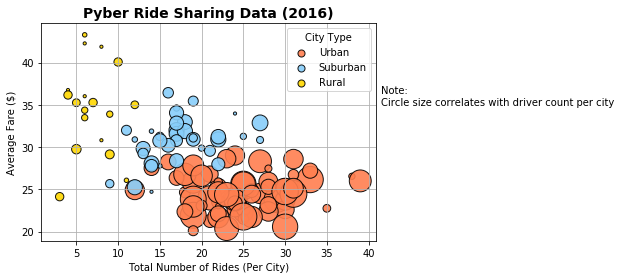

In [6]:
#create data frames for each city type then group by city
urban = merge_data[merge_data["type"] =="Urban"].groupby([merge_data["city"]])
suburban = merge_data[merge_data["type"] =="Suburban"].groupby([merge_data["city"]])
rural = merge_data[merge_data["type"] =="Rural"].groupby([merge_data["city"]])


#calculate the values for the x & y axis. also calculate a value to use for the size of the bubbles
urban_x = urban["ride_id"].count()
urban_y = urban["fare"].mean()
urban_size = urban["driver_count"].mean()
suburban_x = suburban["ride_id"].count()
suburban_y = suburban["fare"].mean()


suburban_size = suburban["driver_count"].mean()
rural_x = rural["ride_id"].count()
rural_y = rural["fare"].mean()
rural_size = rural["driver_count"].mean()


#create scatter plot
plt.scatter(urban_x,urban_y, s=urban_size * 10, marker="o", facecolor="coral", edgecolors="black", alpha = 0.90, label = "Urban")
plt.scatter(suburban_x,suburban_y,s=suburban_size * 10, marker="o", facecolor="lightskyblue", edgecolors="black", alpha = 0.90, label = "Suburban")
plt.scatter(rural_x,rural_y,s=rural_size * 10, marker="o", facecolor="gold", edgecolors="black", alpha = 0.90, label = "Rural")
plt.grid()
            
            
#create title and lables
plt.title("Pyber Ride Sharing Data (2016)", fontsize=14, weight="bold")
plt.xlabel("Total Number of Rides (Per City)", fontsize=10)
plt.ylabel("Average Fare ($)", fontsize=10)
            
            
#create legend
legend = plt.legend(title="City Type", fontsize = 10, loc="upper right")
            
            
#change markers size for legend one by one using _sizes property found here: https://stackoverflow.com/questi ons/24706125/setting-a-fixed-size-for-points-in-legend
legend.legendHandles[0]._sizes = [50]
legend.legendHandles[1]._sizes = [50]
legend.legendHandles[2]._sizes = [50]
            

#text outside of plot found here: https://stackoverflow.com/questions/42435446/how-to-put-text-outside-python plots
plt.text(41.5,35, "Note: \nCircle size correlates with driver count per city", fontsize=10)


#save the figure. using bbox in order to fix the note's text so it shows
plt.savefig("data/PyberRideSharingData2016.png",bbox_inches="tight")


#shows the scatter plot
plt.show()            
            
            

In [7]:

#create a data frame grouped by "type", then calculate the sum of fares by "type"
type_group = merge_data.groupby(["type"])
total_fares_sum = type_group["fare"].sum()


#show the sum values by type for reference
total_fares_sum.head()



type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

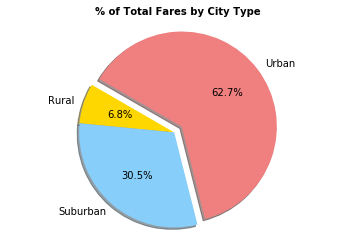

In [8]:
#set up the characteristics for the pie graph
labels = ["Rural","Suburban", "Urban"]
colors = ["gold","lightskyblue","lightcoral"]
explode = [0,0,0.1]


#set up the pie graph
plt.pie(total_fares_sum, labels=labels, colors=colors, explode=explode, shadow=True, startangle=150, autopct= "%1.1f%%")
plt.title("% of Total Fares by City Type", fontsize=10, weight="bold")



#save the plot. using bbox in order to fix the note's text
plt.savefig("data/TotalFaresbyCityType.png",bbox_inches="tight")
plt.axis("equal")
plt.show()



In [9]:
#create a data frame grouped by "type", then calculate the count of ride_ids by "type"
type_group = merge_data.groupby(["type"])
total_rides_count = type_group["ride_id"].count()


#show the count values by type for reference
total_rides_count.head()



type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

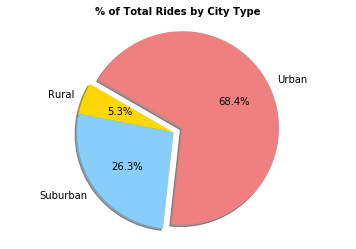

In [10]:
#set up the characteristics for the pie graph
labels = ["Rural","Suburban", "Urban"]
colors = ["gold","lightskyblue","lightcoral"]
explode = [0,0,0.1]


#set up the pie graph
plt.pie(total_rides_count, labels=labels, colors=colors, explode=explode, shadow=True, startangle=150, autopct="%1.1f%%")
plt.title("% of Total Rides by City Type", fontsize=10, weight="bold")
plt.axis("equal")


#save the figure
plt.savefig("data/TotalRidesbyCityType.png",bbox_inches="tight")


#show the pie graph
plt.show()



In [11]:
#create a data frame grouped by "type" using the city_df, then calculate the sum of driver_count by "type"
city_type = city_df.groupby(["type"])
total_drivers_sum = city_type["driver_count"].sum()


#show the sum values by type for reference
total_drivers_sum.head()



type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

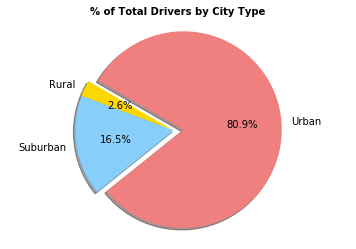

In [12]:
#set up the characteristics for the pie graph
labels = ["Rural","Suburban", "Urban"]
colors = ["gold","lightskyblue","lightcoral"]
explode = [0,0,0.1]


#set up the pie graph
plt.pie(total_drivers_sum, labels=labels, colors=colors, explode=explode, shadow=True, startangle=150, autopct="%1.1f%%")
plt.title("% of Total Drivers by City Type", fontsize=10, weight="bold")
plt.axis("equal")


#save the figure
plt.savefig("data/TotalDriversbyCityType.png",bbox_inches="tight")


#show the pie graph
plt.show()



## Bubble Plot of Ride Sharing Data

In [13]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


In [14]:
# Show plot
plt.show()

## Total Fares by City Type

In [15]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure


In [16]:
# Show Figure
plt.show()

## Total Rides by City Type

In [17]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


In [18]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [19]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


In [20]:
# Show Figure
plt.show()